<a href="https://colab.research.google.com/github/Metallicode/Math/blob/main/Logistic_Regression_with_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Logistic Regression Estimation.

**Maximum Likelihood Estimation (MLE)**


**Definition:**

MLE is a method of estimating the parameters of a statistical model. It finds the parameter values that maximize the likelihood of the observed data, given the model.

**Likelihood vs. Probability:**

**Probability:**

 Given a parameter (or set of parameters) and an outcome, probability tells us how likely that outcome is.


**Likelihood:**

Given an outcome and a range of parameter values, likelihood tells us how consistent the observed data is with the different parameter values.
The Likelihood Function:

This is a function of the parameters which measures how well the model explains the observed data. For a set of data and given model parameters, the likelihood gives a value indicating how probable the observed data is.

##Probability Vs Likelihood

The concepts of probability and likelihood:

### **Probability**

1. **Definition**: Probability measures the likelihood of a specific event or outcome occurring given a certain set of predefined conditions or parameters.

2. **Examples**:
   - The probability of getting a head when flipping a fair coin is \( P(\text{Head}) = 0.5 \).
   - The probability of drawing an ace from a standard deck of cards is \( P(\text{Ace}) = \frac{4}{52} \).

3. **Characteristics**:
   - It is always between 0 and 1, inclusive.
   - The sum of the probabilities of all possible outcomes is always 1.

4. **Function of Outcomes**: For a fixed set of parameters, the probability function gives you the probability for every possible outcome.

### **Likelihood**

1. **Definition**: Likelihood, on the other hand, describes how well the data supports a particular parameter value for a given model. In other words, it gauges the plausibility of a model parameter given observed data.

2. **Examples**:
   - Suppose we flip a coin 10 times and get 7 heads. If the coin is fair (probability of heads = 0.5), what's the likelihood of observing 7 heads in 10 flips?
   - Consider a bag with a mix of black and white balls. If we draw 5 balls and all of them are black, how plausible is it that half of the balls in the bag are white?

3. **Characteristics**:
   - Likelihood isn't confined between 0 and 1.
   - The absolute value of the likelihood isn't interpretable by itself; it's the relative values of likelihood for different parameter values that are meaningful.

4. **Function of Parameters**: For a fixed set of observed outcomes, the likelihood function gives you a value for every possible parameter or set of parameters.

### **Contrasting the Two**:

The key difference lies in what's considered fixed and what's variable:

- **Probability**: Given a fixed parameter (like the probability of heads = 0.5), what's the chance of a particular outcome (like 7 heads in 10 flips)?
- **Likelihood**: Given a fixed outcome (like 7 heads in 10 flips), how plausible are different parameter values (like the probability of heads being 0.5, 0.6, 0.7, etc.)?

To use an analogy, imagine you're aiming an arrow at a target.
- **Probability** is like asking: "If I aim right at the bullseye, what's the chance the arrow will land over there?"
- **Likelihood** is like observing where the arrow landed and asking: "Given where the arrow landed, how likely is it that I was aiming there?"

In summary, while the terms 'probability' and 'likelihood' might sound similar and are sometimes used interchangeably in everyday language, they have distinct meanings in statistics.

###How to calculate both probability and likelihood.



**Probability**:

Calculating probability often depends on the specific scenario or model you're working with. However, a general formula for probability is:

**P(E) = Number of favorable outcomes for event E / Total number of possible outcomes**

For example, in a fair six-sided dice:

**P(rolling a 3) = 1/6**

However, in real-world scenarios or more complex models, probabilities might be derived from empirical data, theoretical models, simulations, or a combination thereof.



**Likelihood**:


To compute the likelihood for a parameter given some data, you'd typically:

1. Specify a statistical model which relates the data to the parameter.
2. Plug in the observed data and the parameter value into the model's probability function.
3. The resulting value is the likelihood of that parameter value given the data.

For instance, consider the example of flipping a coin with an unknown probability p of landing heads:

1. Model: Assume each flip follows a Bernoulli distribution, so the probability of observing k heads in  n flips is

**p^k*(1-p)^n-k**

2. Given Data: Suppose we have 3 heads in 5 flips.
3. Likelihood:
   - Plug in the data (3 heads, 2 tails) and a specific p value into the model:

**L(p,data) = p^3*(1-p)^2**

   - This function L gives the likelihood of different p values given the observed data.

Note: The likelihood is not a probability distribution over p; it doesn't sum/integrate to 1 over its range. It merely gives relative plausibility values for different parameter settings.

To find the parameter value that maximizes this likelihood (often a goal in statistics), you'd use the method of Maximum Likelihood Estimation (MLE). For our coin flip example, differentiating the likelihood with respect to \( p \), setting to zero, and solving would give you the MLE of \( p \) (in this case, it would simply be \( k/n \), or 3/5).

In many real-world scenarios, especially with complex models, likelihood functions might not be easily solvable by hand, and computational methods (like gradient ascent) might be needed to find the MLE.

Remember, while probabilities always lie between 0 and 1, likelihoods can take on any positive value. The key is not the absolute value of the likelihood, but how it compares across different parameter values.

##EDA - Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("hearing_test.csv")
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


<Axes: xlabel='test_result', ylabel='count'>

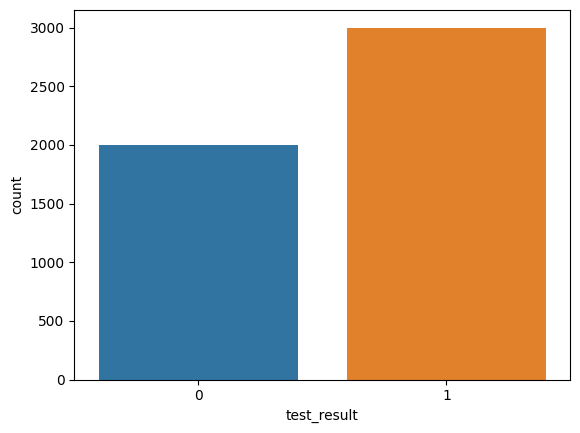

In [14]:
sns.countplot(data=df, x="test_result")

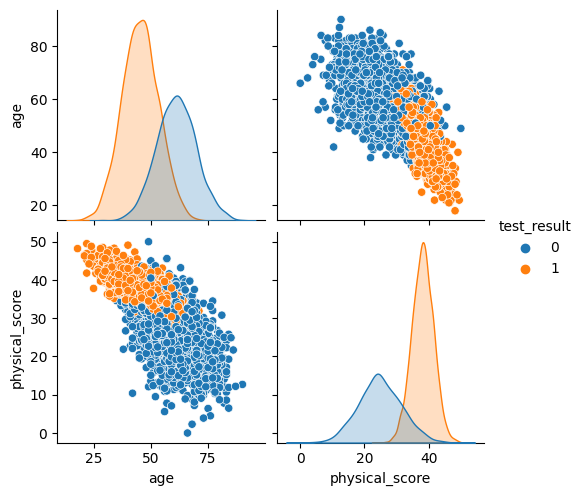

In [15]:
sns.pairplot(df, hue="test_result")

<Axes: xlabel='test_result', ylabel='age'>

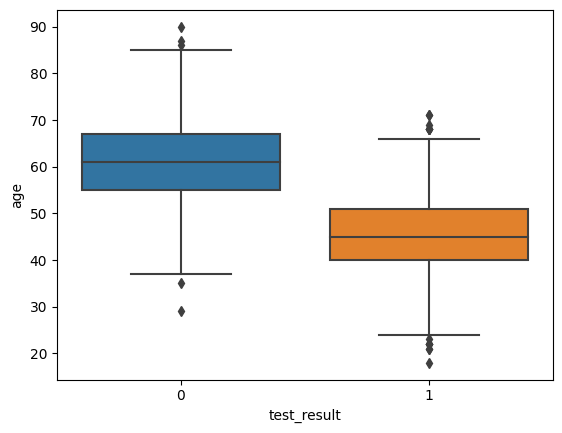

In [4]:
sns.boxplot(data=df,x="test_result", y="age")

<Axes: xlabel='test_result', ylabel='physical_score'>

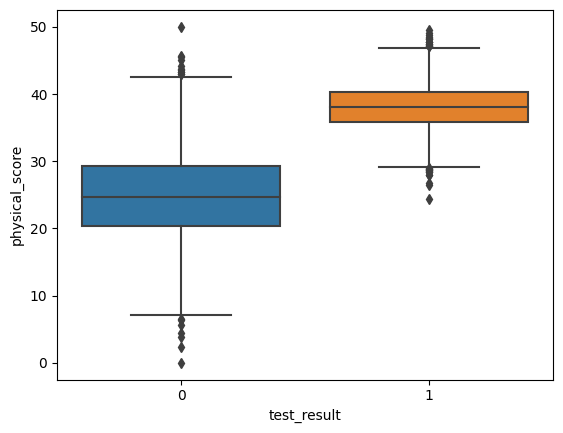

In [5]:
sns.boxplot(data=df,x="test_result", y="physical_score")

<Axes: xlabel='physical_score', ylabel='age'>

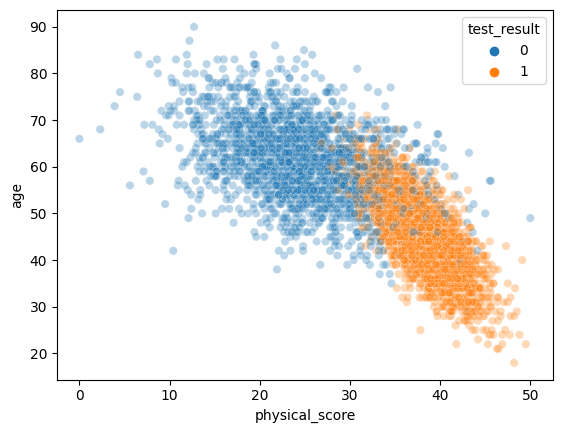

In [12]:
sns.scatterplot(data=df,x="physical_score", y="age", hue="test_result", alpha=0.3)

In [17]:
df.corr()

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


<Axes: >

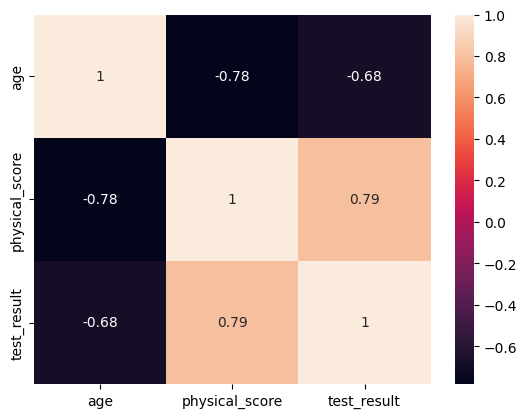

In [18]:
sns.heatmap(df.corr(), annot=True)

#Logistic Regression with Scikit-Learn

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression ##There is also a CV version of this

In [22]:
df.columns

Index(['age', 'physical_score', 'test_result'], dtype='object')

##Split features and lable

In [26]:
X = df.drop(['test_result'], axis=1)
y  = df['test_result']

In [27]:
X

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9
...,...,...
4995,73.0,3.9
4996,57.0,33.9
4997,49.0,34.5
4998,38.0,46.4


In [28]:
y

0       1
1       1
2       0
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    1
4999    1
Name: test_result, Length: 5000, dtype: int64

##train test split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

##Scale features

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [35]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

##create LogisticRegression model

In [34]:
LR_model = LogisticRegression()

In [36]:
LR_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [38]:
LR_model.coef_

array([[-0.90278561,  3.53006438]])

In [ ]:
y_pred = LR_model.predict(X_test_scaled)
y_pred

In [ ]:
LR_model.predict_proba(X_test_scaled) ##Notice shape has probibilaty for class a and calss b

#Classification Metrics

##Confusion Matrix and Accuracy

###Binary Classification Outcomes
having two classes [A,B], this is what we can expect from a Classification model prediction:

```
* True A    (True Positive)
* True B    (True Negative)
* False A   (False Positive)
* False B   (False Negative)
```

##Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)

cf_matrix

array([[164,  32],
       [ 13, 291]])

<Axes: >

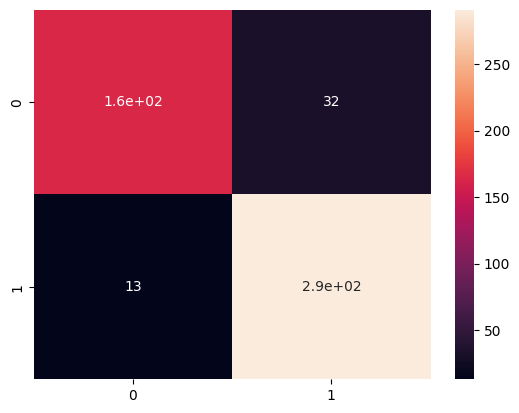

In [48]:
sns.heatmap(cf_matrix, annot=True)
plt.xlabel ('prediction')
plt.ylabel ('real')

Text(50.722222222222214, 0.5, 'real')

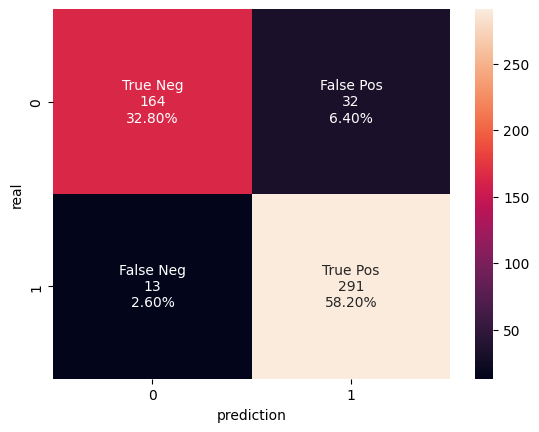

In [58]:
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

group_names = ['True Neg','False Pos','False Neg' ,'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')
plt.xlabel ('prediction')
plt.ylabel ('real')

##Accuracy

Accuracy is calculated this way:

```
Accuracy = (True Pos + True Neg) / Total

```


In [55]:
cf_matrix

array([[164,  32],
       [ 13, 291]])

In [56]:
Total = len(y_pred)

True_Pos = cf_matrix[0][0]
True_Neg = cf_matrix[1][1]

In [57]:
Accuracy = (True_Pos+True_Neg) / Total
Accuracy

0.91

##The Accuracy Paradox

imagin a model that returns always the same class lable.
even that this model is obviously bad, if we would to mesure it's Accuracy wouldn't show this.

let's say from our example:

304/500 = 0.608

which is just reflecting the actual classe distribution in our data.


##Precison, Recall, F1-Score